In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_10_iters = pd.read_csv('metrics_results_maxIters_10.csv')
df_100_iters = pd.read_csv('metrics_results_maxIters_100.csv')
df_1000_iters = pd.read_csv('metrics_results_maxIters_1000.csv')
df_50_iters = pd.read_csv('metrics_results_maxIters_50.csv')
df_500_iters = pd.read_csv('metrics_results_maxIters_500.csv')
df_5000_iters = pd.read_csv('metrics_results_maxIters_5000.csv')

df_10_iters['Iterations'] = '10'
df_100_iters['Iterations'] = '100'
df_1000_iters['Iterations'] = '1000'
df_50_iters['Iterations'] = '50'
df_500_iters['Iterations'] = '500'
df_5000_iters['Iterations'] = '5000'
df_combined = pd.concat([df_10_iters, df_100_iters, df_1000_iters,df_50_iters, df_500_iters, df_5000_iters], ignore_index=True)
df_combined = df_combined.drop(columns=['Run'])

df_combined['Success'] = df_combined['Best Value'].apply(lambda x: 1 if x == 0 else 0)

display(df_combined)


,Best Value,Best Iteration,Total Accepted Moves,Total Rejected Moves,Total Distance Traveled,Total Deviation from Optimum,Distinct Positions Visited,End-to-End Distance,Average Move Distance,Standard Deviation Objective,Acceptance Rate,Best Solution Improvements,Total Function Value Change,Exploration-Exploitation Ratio,Iterations,Success
0,593.0,7,10,1,10.656854,7218.0,6,2.000000,1.065685,43.266233,0.909091,3,433.0,1.172254,10,0
1,2601.0,7,10,1,7.656854,29783.0,7,4.242641,0.765685,132.435482,0.909091,5,524.0,0.842254,10,0
2,530.0,7,11,0,10.656854,6445.0,6,2.236068,0.968805,34.320560,1.000000,3,335.0,0.968805,10,0
3,1061.0,9,11,0,8.656854,13402.0,8,5.000000,0.786987,106.198162,1.000000,6,377.0,0.786987,10,0
4,3130.0,8,9,2,6.414214,36690.0,7,5.000000,0.712690,144.092372,0.818182,4,493.0,0.871066,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,1475,4680,321,4937.498193,537694.0,710,10.049876,1.055021,100.114360,0.935813,13,56952.0,1.127385,5000,1
296,0.0,1077,4693,308,4944.142853,622969.0,833,38.000000,1.053514,180.370188,0.938412,59,56938.0,1.122656,5000,1
297,0.0,802,4658,343,4932.782464,771917.0,846,38.327536,1.058992,187.126867,0.931414,54,64461.0,1.136972,5000,1
298,0.0,1159,4700,301,4987.392637,595466.0,779,45.122057,1.061147,199.572476,0.939812,63,55477.0,1.129106,5000,1


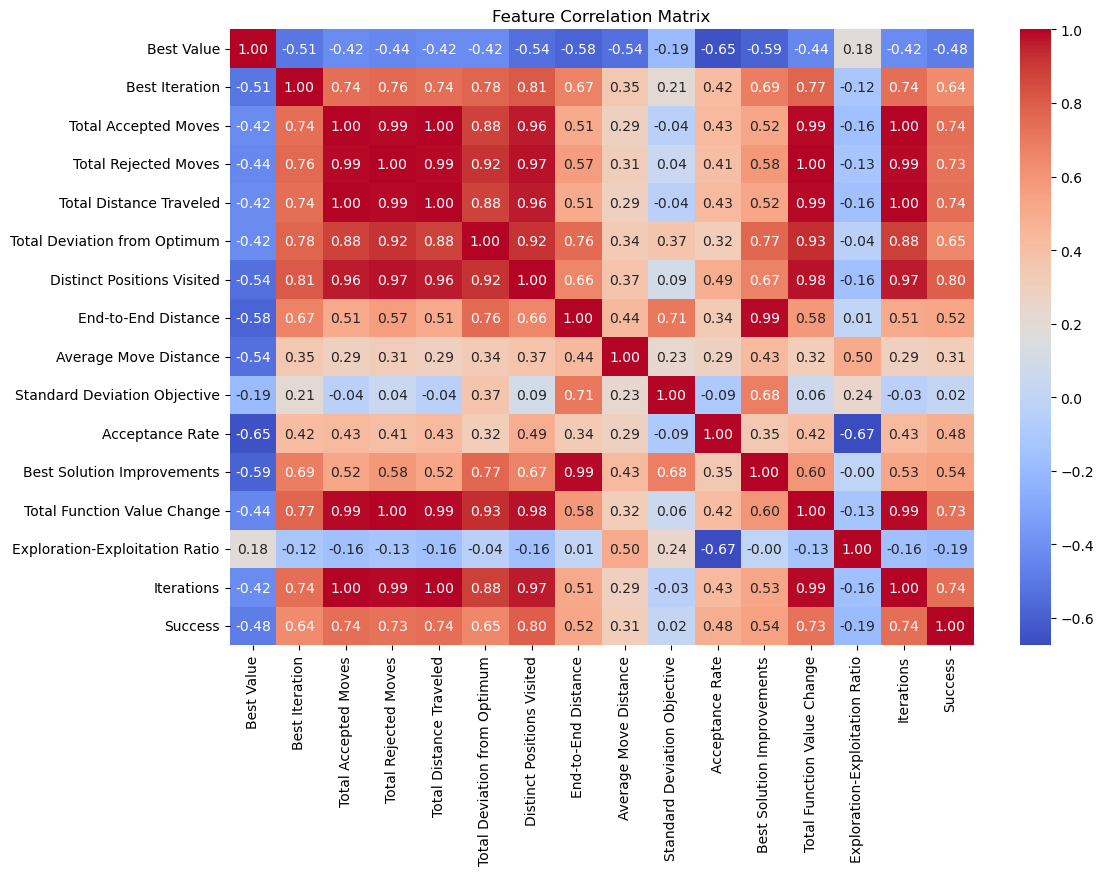

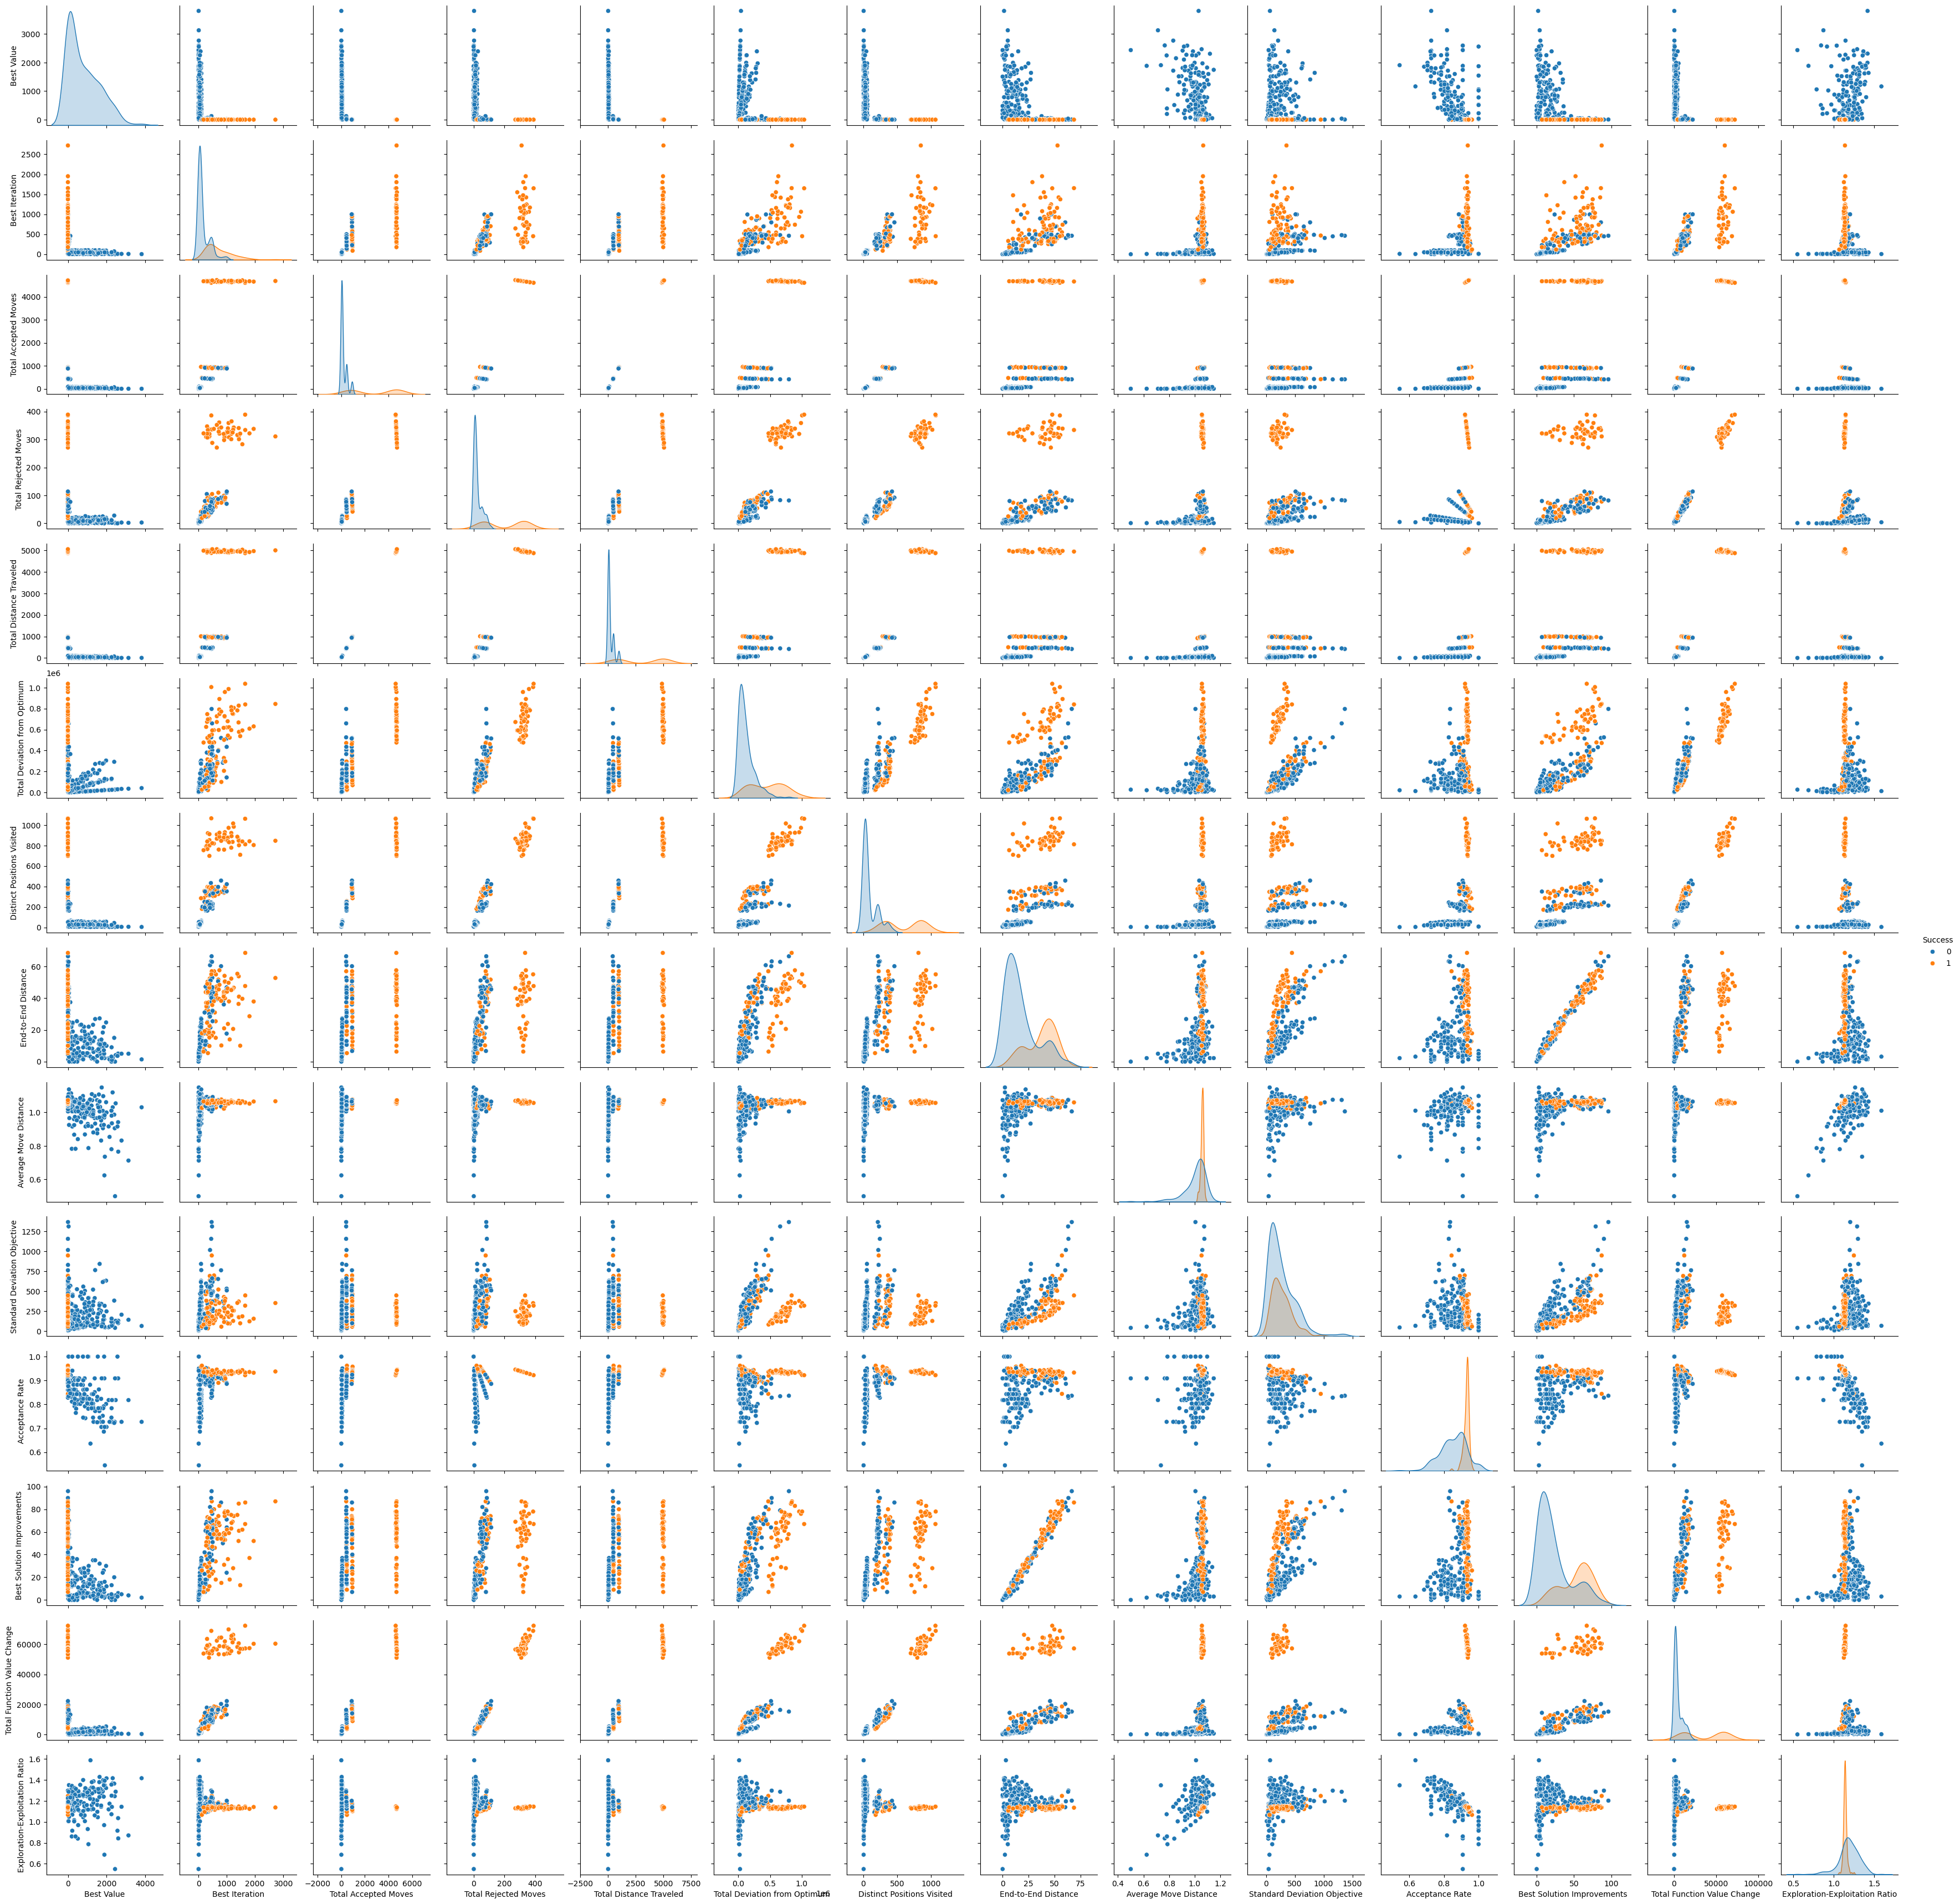

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df_combined.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Pairplot with hue set to 'Success' to distinguish good and bad runs
sns.pairplot(df_combined, hue="Success")
plt.show()


#run for 100 and try to decide whether if it were to run for 1000 is it likely to reach the optima take my 100 and run it then for 1000 my first 100 are my feature vector and then we try extract to see if itll reach the 1000 which are the classifier 
#then pick the top 10 from the 100 
#the clupatra sequence representation can be the feature vector including the stuff above 

#is it doing well so far and is it worth continuing 
#have to specify enough that someone can repeat my experiment without having to point at a screen
#just what not why just yet 
#it needs a way of using the clupatra sequence to decide whether its going into a valley or ridge using for models 
#make a hypothesis and systematically test it 

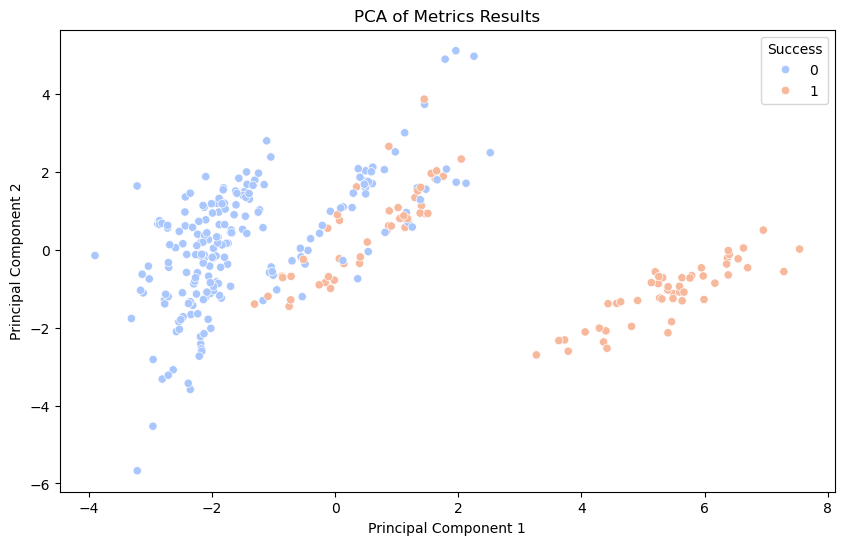

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        62
           1       0.91      0.71      0.80        28

    accuracy                           0.89        90
   macro avg       0.90      0.84      0.86        90
weighted avg       0.89      0.89      0.88        90

Confusion Matrix:
 [[60  2]
 [ 8 20]]


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Preprocess the Data
# Separate features and target
X = df_combined.drop(columns=['Success', 'Best Value', 'Iterations']) 
y = df_combined['Success']  # Target for classification

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: PCA
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Success'] = y.reset_index(drop=True)  # Add success label for visualization

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2', hue='Success', palette='coolwarm')
plt.title("PCA of Metrics Results")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
